In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix

from yellowbrick.model_selection import LearningCurve
import xgboost as xgb

np.warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean.csv")
df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,71,100083,0,0,1,0,1,0,103500.0,573628.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,124,100145,0,0,0,0,1,1,202500.0,260725.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,152,100179,0,0,0,0,0,0,202500.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,161,100190,0,0,1,0,0,0,162000.0,263686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,255,100295,1,0,1,0,0,1,225000.0,1019205.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,307358,456083,0,0,0,0,1,2,112500.0,361462.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
8598,307359,456084,0,0,0,0,1,1,99000.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8599,307407,456140,1,0,0,0,1,1,261000.0,711454.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
8600,307456,456195,0,0,0,0,1,0,94500.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [3]:
X = df.drop(["TARGET"] , axis=1)
y = df.TARGET

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [5]:
X_train.shape

(6881, 122)

In [6]:
y_test.shape

(1721,)

# Preprocessing

In [7]:
preprocessing_ss = Pipeline(steps=[
    ('normal' , StandardScaler())])

In [8]:
sm = SMOTE( sampling_strategy='auto')

# 1 Iteration  , Logistic Regression + Standard Scaler 

In [9]:
pipeline_DC = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_ss],
                                    ['classifier', LogisticRegression()]
                                     ])
                                     

In [10]:
pipeline_DC.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', LogisticRegression()]])

# score to see if the model performed well

In [11]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))

accuracy train : 0.939
accuracy test : 0.945


In [12]:
y_pred_DC = pipeline_DC.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred_DC))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



# Visualisation to see if the model performed well 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

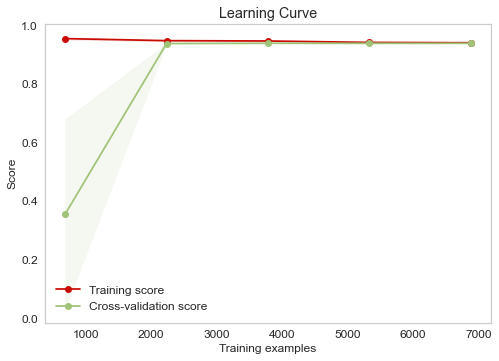

In [14]:
plot_learning_curve(pipeline_DC, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

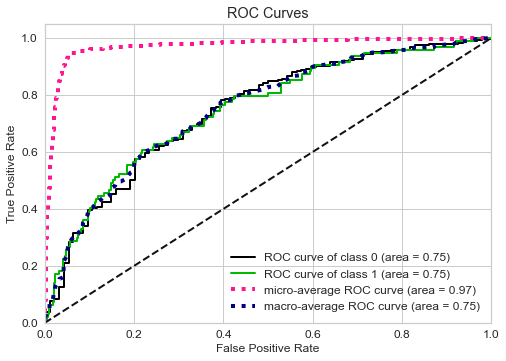

In [15]:
pipeline_DC.fit(X_train, y_train)
y_probas = pipeline_DC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

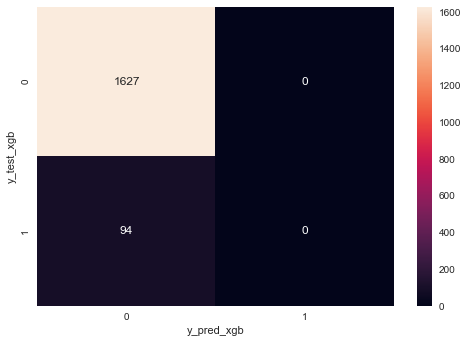

In [16]:
cm = confusion_matrix(y_test, y_pred_DC)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

# 2 Iteration Logistic Regression +  Smote 

In [17]:
pipeline_sm_lr = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', LogisticRegression()]
                                     ])

In [18]:
pipeline_sm_lr.fit(X_train , y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ['classifier', LogisticRegression()]])

# Score to see the model performance


In [19]:
print("accuracy train : %.3f"%pipeline_sm_lr.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_sm_lr.score(X_test , y_test))

accuracy train : 0.540
accuracy test : 0.552


In [20]:
y_pred_sm_lr = pipeline_sm_lr.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_sm_lr))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      1627
           1       0.07      0.61      0.13        94

    accuracy                           0.55      1721
   macro avg       0.52      0.58      0.41      1721
weighted avg       0.91      0.55      0.67      1721



# Visualisation to see the model performance 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

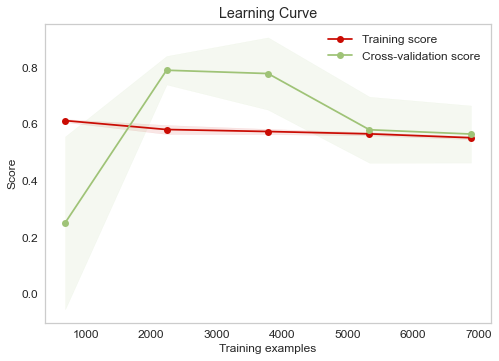

In [22]:
plot_learning_curve(pipeline_sm_lr, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

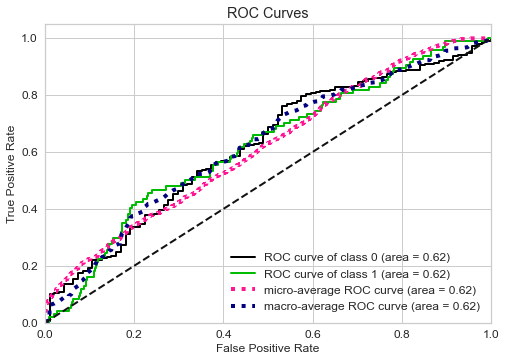

In [23]:
pipeline_sm_lr.fit(X_train, y_train)
y_probas = pipeline_sm_lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

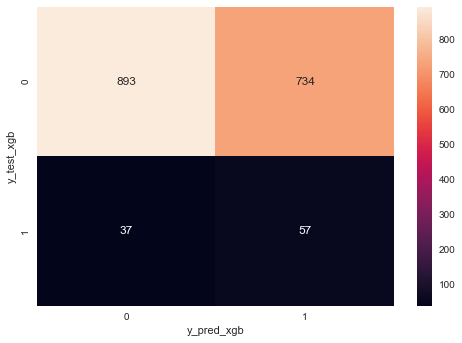

In [24]:
cm = confusion_matrix(y_test, y_pred_sm_lr)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

# 3 Iteration Knn + Standard Scaler

In [25]:
pipeline_knn = Pipeline(steps =[['preprocessing' , preprocessing_ss],
                               ["Knn" ,  KNeighborsClassifier()]]) 

In [26]:
pipeline_knn.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['Knn', KNeighborsClassifier()]])

# Score to see model performance 

In [27]:
print("accuracy train : %.3f"%pipeline_knn.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_knn.score(X_test , y_test))

accuracy train : 0.938
accuracy test : 0.942


In [28]:
y_pred_knn = pipeline_knn.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.14      0.01      0.02        94

    accuracy                           0.94      1721
   macro avg       0.54      0.50      0.50      1721
weighted avg       0.90      0.94      0.92      1721



# Visualisation to see model performance

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

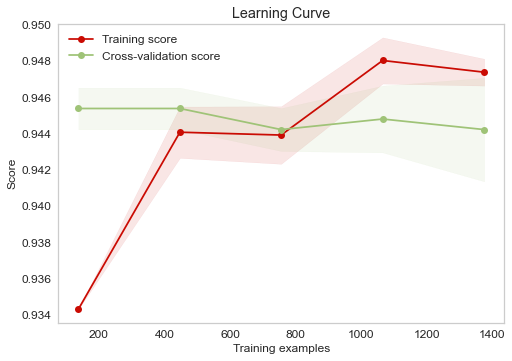

In [30]:
plot_learning_curve(pipeline_knn, X_test, y_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

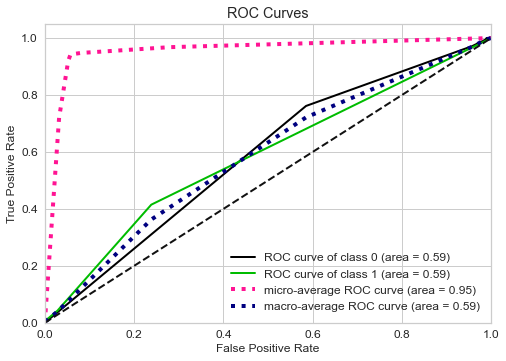

In [31]:
pipeline_knn.fit(X_train, y_train)
y_probas = pipeline_knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

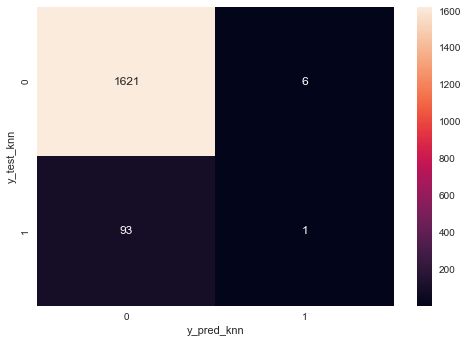

In [32]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_knn')
plt.ylabel('y_test_knn') 
plt.show()

# XGBOOST ITERATION


In [33]:
pipeline_xgb = Pipeline(steps=[['preprocess standard scaler ' , preprocessing_ss] , 
                                ['model_xgboost' , XGBClassifier()]])

In [34]:
pipeline_xgb.fit(X_train , y_train)

[09:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess standard scaler ',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['model_xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validat

# Score to see model performance

In [35]:
print("accuracy train : %.3f"%pipeline_xgb.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgb.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.945


In [36]:
y_pred_xgb = pipeline_xgb.predict(X_test)

In [37]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.33      0.01      0.02        94

    accuracy                           0.94      1721
   macro avg       0.64      0.50      0.50      1721
weighted avg       0.91      0.94      0.92      1721



# Visualisation to see model performance

[09:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

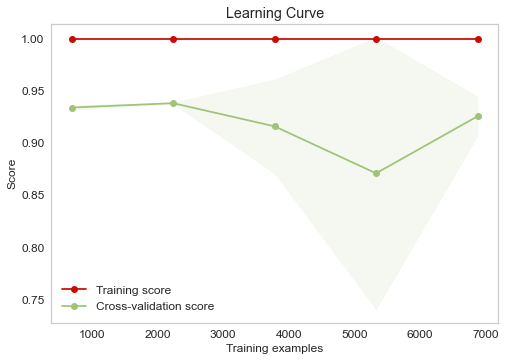

In [38]:
plot_learning_curve(pipeline_xgb, X, y)

[09:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

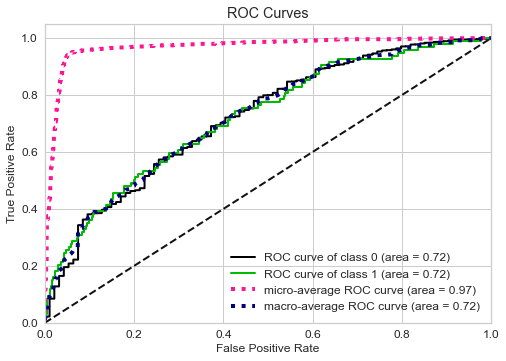

In [39]:
pipeline_xgb.fit(X_train, y_train)
y_probas = pipeline_xgb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

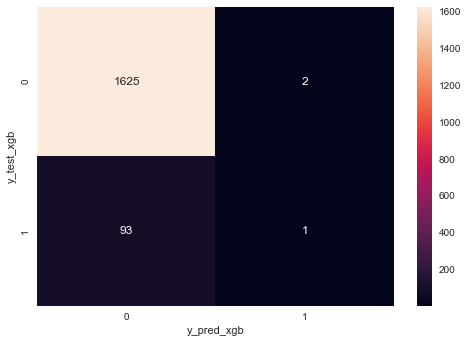

In [40]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
pipeline_dtc = Pipeline(steps =[['preprocessing' , preprocessing_ss],
                               ["Knn" , DecisionTreeClassifier()]]) 

In [43]:
pipeline_dtc.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['Knn', DecisionTreeClassifier()]])

In [44]:
print("accuracy train : %.3f"%pipeline_dtc.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_dtc.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.885


In [45]:
y_pred_dtc = pipeline_dtc.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1627
           1       0.10      0.14      0.12        94

    accuracy                           0.88      1721
   macro avg       0.52      0.53      0.53      1721
weighted avg       0.90      0.88      0.89      1721



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

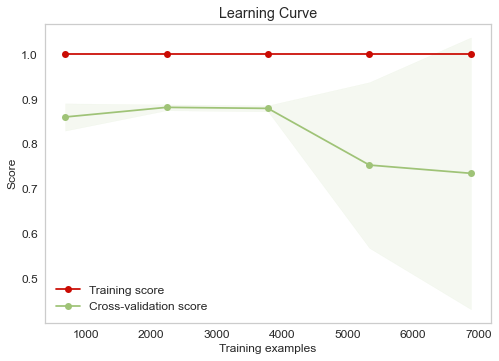

In [47]:
plot_learning_curve(pipeline_dtc, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

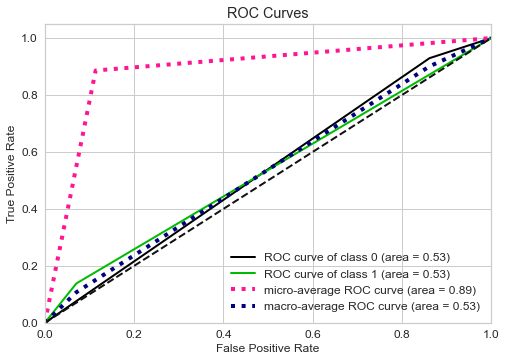

In [48]:
pipeline_dtc.fit(X_train, y_train)
y_probas = pipeline_dtc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

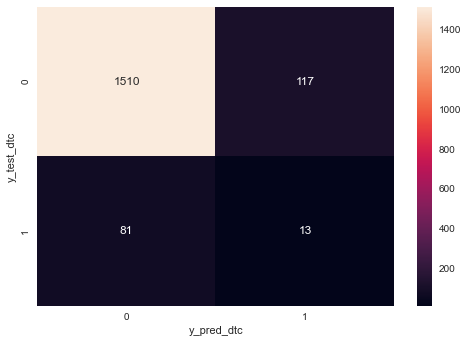

In [49]:
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_dtc')
plt.ylabel('y_test_dtc') 
plt.show()

In [52]:
pipeline_xgb_sm = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', XGBClassifier()]
                                     ])

In [53]:
pipeline_xgb_sm.fit(X_train , y_train)

[09:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None)]])

In [54]:
print("accuracy train : %.3f"%pipeline_xgb_sm.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgb_sm.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.942


In [55]:
y_pred_xgb_sm = pipeline_dtc.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_xgb_sm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1627
           1       0.10      0.14      0.12        94

    accuracy                           0.89      1721
   macro avg       0.53      0.53      0.53      1721
weighted avg       0.90      0.89      0.89      1721



[09:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

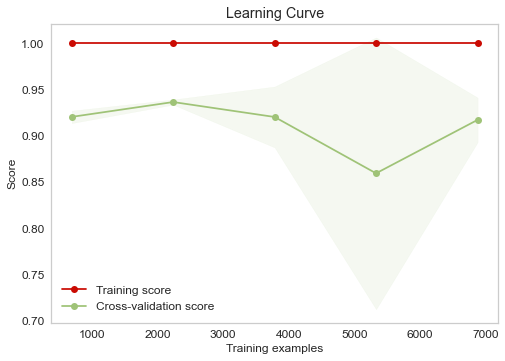

In [57]:
plot_learning_curve(pipeline_xgb_sm, X, y)

[09:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

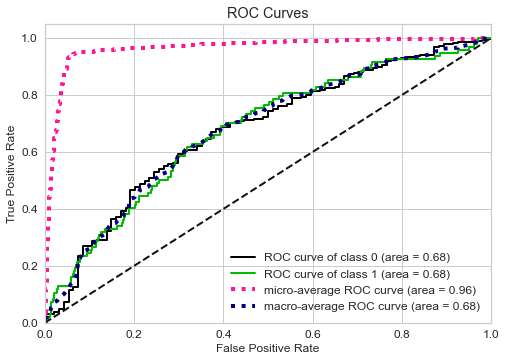

In [59]:
pipeline_xgb_sm.fit(X_train, y_train)
y_probas_xgb_sm = pipeline_xgb_sm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_xgb_sm)

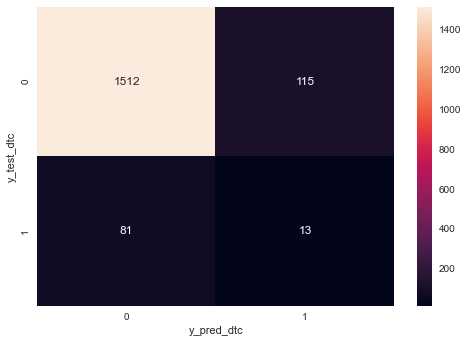

In [62]:
cm = confusion_matrix(y_test, y_pred_xgb_sm)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_dtc')
plt.ylabel('y_test_dtc') 
plt.show()

In [ ]:
import pickle
with open("test_pickle.pkl" , "wb")